In [1]:
import numpy as np

In [228]:
tau_red = np.load("./example_field.npy")
tau_real = np.load("./example_gen_field.npy")

#very quickly created rough sims...


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


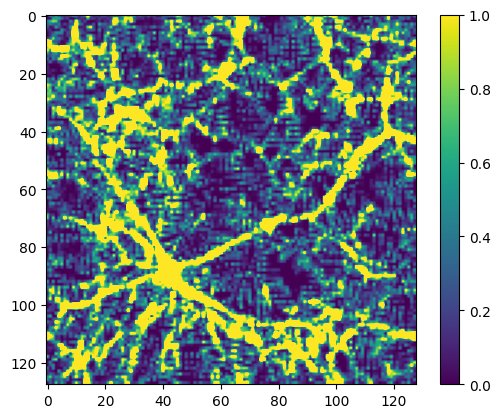

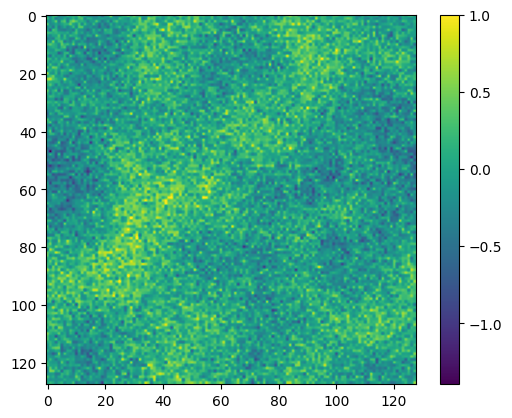

In [229]:
%pylab inline
from nbodykit.source.mesh import BigFileMesh

import nbodykit

imshow(tau_red[0],vmax=1)
colorbar()
show()


imshow(tau_real[0],vmax=1)
colorbar()
show()

In [230]:
flux_raw = np.exp(-tau_red+0.1)
flux_red = flux_raw/flux_raw.mean()-1

flux_raw = tau_real
flux_real = flux_raw/flux_raw.mean()-1

In [231]:
np.save("flux_red",flux_red)

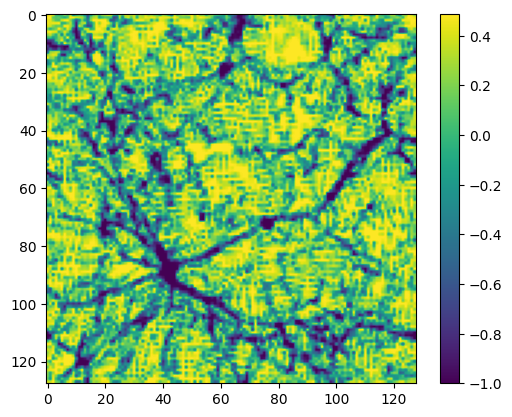

In [232]:
imshow(flux_red[-1])
colorbar()

In [233]:
from scipy import ndimage

In [234]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(flux_red, 128)
pm_real = nbodykit.source.mesh.array.ArrayMesh(flux_real, 128)

In [235]:
#choice of dk and kmin are open for exploration... smaller dk will likely be less numerically stable for later optimization

r_red = FFTPower(pm_red, mode='1d', dk=0.050, kmin=0.00001)
r_real = FFTPower(pm_real, mode='1d', dk=0.050, kmin=0.00001)

In [236]:
Pk_red = r_red.power
Pk_real = r_real.power

Text(0, 0.5, '$kP(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

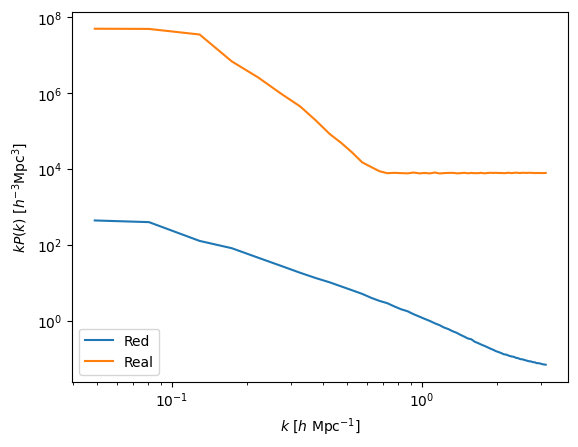

In [237]:
labels = ["Red","Real"]
for i,Pk in enumerate([Pk_red,Pk_real]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$kP(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [197]:
np.save("1d",Pk_red['power'].real)
np.save("1d_k",Pk_red['k'].real)

In [129]:
#1d powerspectra is vert similar in redshift and real space, not super-suprising... 

In [130]:
pm_red.to_real_field().shape

(128, 128, 128)

In [142]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=1.0, kmin=1, Nmu=4, los=[0,0,1])
Pkmu_red = r_red_2d.power

r_real_2d = FFTPower(pm_real, mode='2d', dk=1.0, kmin=1, Nmu=4, los=[0,0,1])
Pkmu_real = r_real_2d.power


In [143]:
Pkmu_red['power']

array([[       nan+nanj,        nan+nanj, 0.37560754 +0.j,
        0.36192418 +0.j],
       [       nan+nanj,        nan+nanj, 0.10871296 +0.j,
        0.0881692  +0.j]])

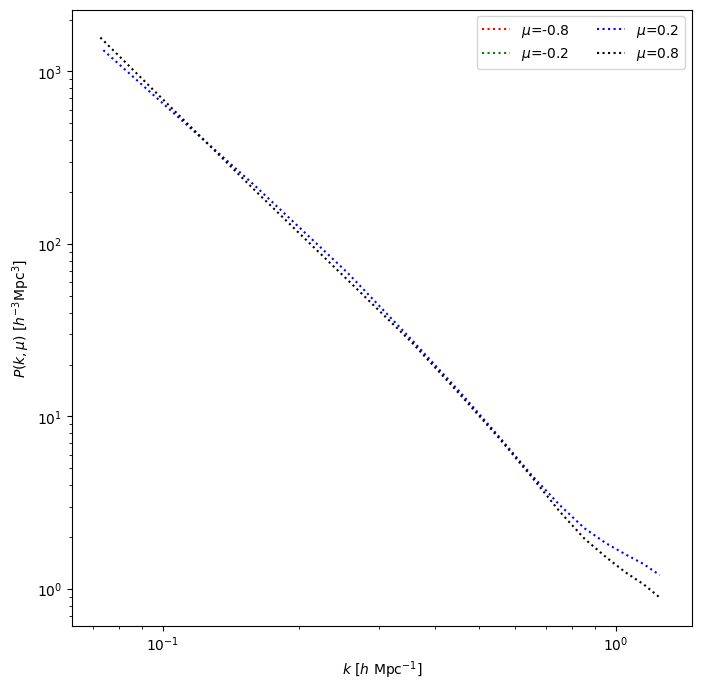

In [91]:
plt.figure(figsize=(8,8))

# plot each mu bin
lines = ["r","g","b","k","y"]
for i in range(Pkmu_red.shape[1]):
    Pk = Pkmu_red[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real,lines[i]+":", label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot realspace as little dots on top
for i in range(Pkmu_real.shape[1]):
    Pk = Pkmu_real[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
    plt.loglog(Pk['k'], 1.1*Pk['power'].real,lines[i]+"--", label=label)

In [92]:
#redshift space has much greater mu variation compared to real space, as expected

In [93]:
#readout to file, some indexing gymnastics needed...
output_all = []
for i in range(0,4):
    output_all.append([Pkmu_red[:,i]["k"],Pkmu_red[:,i]["mu"],Pkmu_red[:,i]["power"].real])
np.save("pkmu_red_4",np.swapaxes(np.array(output_all),1,2).reshape(-1,3))

In [94]:
Pkmu_red["power"]

array([[           nan+nanj,            nan+nanj, 1.32863932e+03 +0.j,
        1.57368913e+03 +0.j],
       [           nan+nanj,            nan+nanj, 2.18978734e+02 +0.j,
        2.03771764e+02 +0.j],
       [           nan+nanj,            nan+nanj, 6.78344881e+01 +0.j,
        6.15000298e+01 +0.j],
       [           nan+nanj,            nan+nanj, 2.77416983e+01 +0.j,
        2.68007714e+01 +0.j],
       [           nan+nanj,            nan+nanj, 1.37879495e+01 +0.j,
        1.33757221e+01 +0.j],
       [           nan+nanj,            nan+nanj, 7.60155758e+00 +0.j,
        7.47276775e+00 +0.j],
       [           nan+nanj,            nan+nanj, 4.55316917e+00 +0.j,
        4.45034599e+00 +0.j],
       [           nan+nanj,            nan+nanj, 3.06171480e+00 +0.j,
        2.80883495e+00 +0.j],
       [           nan+nanj,            nan+nanj, 2.25333829e+00 +0.j,
        1.96115783e+00 +0.j],
       [           nan+nanj,            nan+nanj, 1.83996494e+00 +0.j,
        1.52789422e+